# CORRELATION BETWEEN HAPPINESS AND CHEATING

# ABSTRACT:

"Hard work and Happiness are not mutually exclusive" is a **FACT** and not a cliche. This report is a small attempt to verify this using "System dynamics" model. Our model has two stocks(HAPPINESS and GRADES), which we will use to check if theres any correlation between **HAPPINESS & CHEATING**.
We have used two extreme cases for the purpose of Testing our **HYPOTHESIS**.
The model is implemented in Python 3.6 using the code shared by Professor.

# INTRODUCTION:

 The purpose of this report is to address the repercussions of the immoral practice that is being done by the students at nearly every level of their studies i.e "CHEATING", the result is "UNHAPPINESS" and "UNFULFILLMENT". They might get happy with their Grades at that moment but it won't last long because true fulfillment comes from utlizing your potential and gifts. 
 
The model we have used is the one shared by **Professor**. This model has two Stocks Happiness stock and a Grade stock that use some predefined values and 3 parameters i.e Hardwork, cheating and getting caught cheating.

Below is the schematic of our System dynamic model shared by the professor.

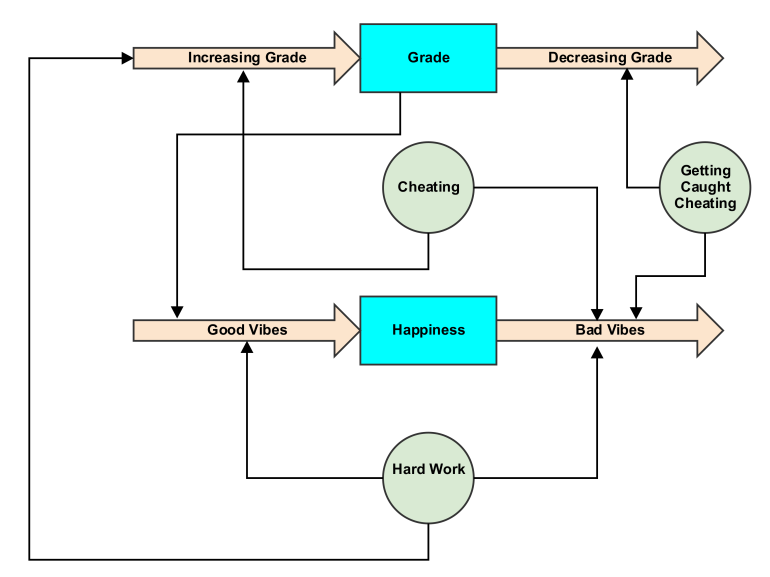

Note that, apart from just inflows there are also outflows in each stock.

# METHOD:

I have implemented model that was built by the professor, the code is written in Python 3, the "Numpy" was used to work with the arrays while the "Matplot lib" was used to for plotting.

Since main component of system dynamics is "Stocks", the Object Oriented nature of Python was utliized here, there's a separate class for each Stock. i.e "Grade" and "Happiness" each of which contains the method "Update", which can be called after creating the instance from both the classes. The update method is where the computations is being carried out.

There's also function called(main) in which the parameters are passed and instances are created from both the classes. 
For time series plot we have to gather or compute many values, for that we have created two ZERO arrays, We then looped through them using "For" loop for the given number of days. The arrays are updated at each Iteration using the "Update" method from the respective classes.
The function then returns the "Time Series Plot" for "Happiness" and "Grade".

In [22]:
#Importing the libraries and modules

import numpy as np
import matplotlib.pyplot as plt


In [23]:
#Code

DAYS = 90

# Parameters - fixed for the simulation - all values should be [0-100]

PARAMETER_CHEATING = 80.0 # Relative amount of cheating
PARAMETER_GETTING_CAUGHT_CHEATING = 20.0 # Probability of getting caught
PARAMETER_HARD_WORK = 40.0 # Relative amount of hard work

# In the above, 80 20 40 gives me a decent set of curves with good grade
# but low happiness

# Initial conditions
INITIAL_HAPPY_VALUE = 50.0
INITIAL_GOOD_VIBES_FLOW = 0.0
INITIAL_BAD_VIBES_FLOW = 0.0
INITIAL_INCREASING_GRADE_FLOW = 0.0
INITIAL_DECREASING_GRADE_FLOW = 0.0
INITIAL_GRADE_VALUE = 0.0

class HappinessStock(object):
    """
    This is the stock for "happiness" - it will always hold values between
    and including 0 and 100
    """
    def __init__(self, initial_happy_value,
                 initial_good_vibes_flow,initial_bad_vibes_flow):
        """
        Initialize the stock and its incoming and outgoing flows
        """
        self._happy_value = initial_happy_value
        self._good_vibes_flow = initial_good_vibes_flow
        self._bad_vibes_flow = initial_bad_vibes_flow
        
    def update(self, grade=None, hard_work=None,
               cheating=None, getting_caught_cheating=None):

        # Defines the factor by which we increment the stock
        INCREMENT_FACTOR = 0.001
        
        """
        Computes a new value for the happiness stock as a function of current
        values of happiness, grade, hard_work, cheating and
        getting_caught_cheating.
        Assumes the happy value will always be in the 0 to 100 range.
        Returns the happy value to the calling unit
        """
        
        # Note that hard_work can often increase or decrease happiness, depending
        # on the amount. Here, we assume that hard work of up to 90 is "positive"
        # and anything over that is too much, or "negative"
        
        positive_hard_work = min(hard_work, 90.0)
        negative_hard_work = max(0.0, hard_work-90.0)
        # Adjust the current incoming and outgoing flows by adding
        # a percentage of parameters.
        self._good_vibes_flow += INCREMENT_FACTOR*(grade + positive_hard_work)
        self._bad_vibes_flow += INCREMENT_FACTOR*(cheating +
        getting_caught_cheating +
        negative_hard_work)
        
        # Be sure that flows do not go outside the 0 to 100 range
        if self._good_vibes_flow > 100.0: self._good_vibes_flow = 100.0
        if self._good_vibes_flow < 0.0: self._good_vibes_flow = 0.0
        if self._bad_vibes_flow > 100.0: self._bad_vibes_flow = 100.0
        if self._bad_vibes_flow < 0.0: self._bad_vibes_flow = 0.0
        
        # Compute the net flow for the happiness stock
        net_flow = self._good_vibes_flow - self._bad_vibes_flow
        
        # Compute a new happy value and keep it in the 0 to 100 range
        new_value = self._happy_value + net_flow
        if new_value > 100.0: new_value = 100.0
        if new_value < 0.0: new_value = 0.0
        self._happy_value = new_value
        return self._happy_value

class GradeStock():
    """
    This is the stock for "grade" - it will always hold values between
    and including 0 and 100
    """
    
    def __init__(self, initial_grade_value=None,
    initial_increasing_grade_flow=None,
    initial_decreasing_grade_flow=None):
        """
        Initialize the stock and its incoming and outgoing flows
        """
        self._grade_value = initial_grade_value
        self._increasing_grade_flow = initial_increasing_grade_flow
        self._decreasing_grade_flow = initial_decreasing_grade_flow
        
    def update(self, hard_work=None,
               cheating=None, getting_caught_cheating=None):
    
        # Defines the factor by which we increment the stock
        INCREMENT_FACTOR = 0.001
        """
        Computes a new value for the grade stock as a function of current
        values of grade, hard_work, cheating and getting_caught_cheating.
        Assumes the happy value will always be in the 0 to 100 range.
        Returns the happy value to the calling unit
        """
        
        # Adjust the current incoming and outgoing flows by adding
        # a percentage of parameters
        self._increasing_grade_flow += INCREMENT_FACTOR*(cheating + hard_work)
        self._decreasing_grade_flow += INCREMENT_FACTOR*(getting_caught_cheating)
        
        # Be sure that flows do not go outside the 0 to 100 range
        if self._increasing_grade_flow > 100.0: self._increasing_grade_flow = 100.0
        if self._increasing_grade_flow < 0.0: self._increasing_grade_flow = 0.0
        if self._decreasing_grade_flow > 100.0: self._decreasing_grade_flow = 100.0
        if self._decreasing_grade_flow < 0.0: self._decreasing_grade_flow = 0.0
        
        # Compute the net flow for the grade stock
        net_flow = self._increasing_grade_flow - self._decreasing_grade_flow
        
        # Compute a new grade value and keep it in the 0 to 100 range
        new_value = self._grade_value + net_flow
        if new_value > 100.0: new_value = 100.0
        if new_value < 0.0: new_value = 0.0
        self._grade_value = new_value
        return self._grade_value
    
def main():
    # Create the initial stocks and flows
    Happy = HappinessStock(initial_happy_value=INITIAL_HAPPY_VALUE,
    initial_good_vibes_flow=INITIAL_GOOD_VIBES_FLOW,
    initial_bad_vibes_flow=INITIAL_BAD_VIBES_FLOW)
    
    Grade = GradeStock(initial_grade_value=INITIAL_GRADE_VALUE,
    initial_increasing_grade_flow=INITIAL_INCREASING_GRADE_FLOW,
    initial_decreasing_grade_flow=INITIAL_DECREASING_GRADE_FLOW)
    
    # These will store the stock values for each day
    happy_time_series = np.zeros((DAYS))
    grade_time_series = np.zeros((DAYS))
    
    # Iterate through the days, updating the values of stocks and flows
    for day in np.arange(DAYS):
        grade_time_series[day] = Grade.update(hard_work=PARAMETER_HARD_WORK,cheating=PARAMETER_CHEATING,
                                              getting_caught_cheating=PARAMETER_GETTING_CAUGHT_CHEATING)
        
        happy_time_series[day] = Happy.update(grade=grade_time_series[day],
                                              hard_work=PARAMETER_HARD_WORK,cheating=PARAMETER_CHEATING,
                                              getting_caught_cheating=PARAMETER_GETTING_CAUGHT_CHEATING)
    
    
    plt.plot(happy_time_series, label='happiness')
    plt.plot(grade_time_series, label='grade')
    plt.legend()
    plt.xlabel('Days')
    plt.ylim(-10,110)
    plt.ylabel('Index')
    plt.show()


### Code testing:

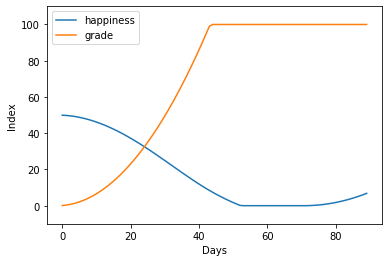

In [24]:
main()

# TESTING AND VERIFICATION

As part of the requirment we are using two EXTREME test cases(as advised) to verify our Hypothesis.
Here we have taken the orignal "main" function and change the values of the 3 parameters(Hard Work, Cheating and Getting Caught Cheating) for each TEST case.

## TEST CASE 1:

In [25]:
# Parameters for Case 1: 

PARAMETER_CHEATING = 80.0 
PARAMETER_GETTING_CAUGHT_CHEATING = 30.0 
PARAMETER_HARD_WORK = 30.0 

def testing_1():
    # Create the initial stocks and flows
    Happy = HappinessStock(initial_happy_value=INITIAL_HAPPY_VALUE,
    initial_good_vibes_flow=INITIAL_GOOD_VIBES_FLOW,
    initial_bad_vibes_flow=INITIAL_BAD_VIBES_FLOW)
    
    Grade = GradeStock(initial_grade_value=INITIAL_GRADE_VALUE,
    initial_increasing_grade_flow=INITIAL_INCREASING_GRADE_FLOW,
    initial_decreasing_grade_flow=INITIAL_DECREASING_GRADE_FLOW)
    
    # These will store the stock values for each day
    happy_time_series = np.zeros((DAYS))
    grade_time_series = np.zeros((DAYS))
    
    # Iterate through the days, updating the values of stocks and flows
    for day in np.arange(DAYS):
        grade_time_series[day] = Grade.update(hard_work=PARAMETER_HARD_WORK,cheating=PARAMETER_CHEATING,
                                              getting_caught_cheating=PARAMETER_GETTING_CAUGHT_CHEATING)
        
        happy_time_series[day] = Happy.update(grade=grade_time_series[day],
                                              hard_work=PARAMETER_HARD_WORK,cheating=PARAMETER_CHEATING,
                                              getting_caught_cheating=PARAMETER_GETTING_CAUGHT_CHEATING)
    
    plt.plot(happy_time_series, label='happiness')
    plt.plot(grade_time_series, label='grade')
    plt.legend()
    plt.xlabel('Days')
    plt.ylim(-10,110)
    plt.ylabel('Index')
    plt.show()


For test 1, we are taking a case of a student with low self esteem who only gives his 30% i.e the hardwork he puts in is 30 while he does cheating 80% of the time and therefore the intial value for Cheating is 80 and we are assuming that the college is moderately strict and the prbobility of getting caught cheating is 30%.

Given these parameters, we are expecting that this student will have hard time with his happiness. The grades will probably be good because he is good at cheating.


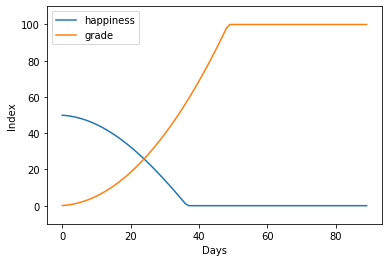

In [26]:
#Calling the function.

testing_1()

***And yes we can see that his happines was at lowest long before he could witness 100% of the grades.***

--------------------------------------------------------------------------------------------------------------------

## TEST CASE 2

In [27]:
# Parameters for Case 2:

PARAMETER_CHEATING = 5.0 
PARAMETER_GETTING_CAUGHT_CHEATING = 50.0 
PARAMETER_HARD_WORK = 90.0 

def testing_2():
    # Create the initial stocks and flows
    Happy = HappinessStock(initial_happy_value=INITIAL_HAPPY_VALUE,
    initial_good_vibes_flow=INITIAL_GOOD_VIBES_FLOW,
    initial_bad_vibes_flow=INITIAL_BAD_VIBES_FLOW)
    
    Grade = GradeStock(initial_grade_value=INITIAL_GRADE_VALUE,
    initial_increasing_grade_flow=INITIAL_INCREASING_GRADE_FLOW,
    initial_decreasing_grade_flow=INITIAL_DECREASING_GRADE_FLOW)
    
    # These will store the stock values for each day
    happy_time_series = np.zeros((DAYS))
    grade_time_series = np.zeros((DAYS))
    
    # Iterate through the days, updating the values of stocks and flows
    for day in np.arange(DAYS):
        grade_time_series[day] = Grade.update(hard_work=PARAMETER_HARD_WORK,cheating=PARAMETER_CHEATING,
                                              getting_caught_cheating=PARAMETER_GETTING_CAUGHT_CHEATING)
        
        happy_time_series[day] = Happy.update(grade=grade_time_series[day],
                                              hard_work=PARAMETER_HARD_WORK,cheating=PARAMETER_CHEATING,
                                              getting_caught_cheating=PARAMETER_GETTING_CAUGHT_CHEATING)
    
    
    plt.plot(happy_time_series, label='happiness')
    plt.plot(grade_time_series, label='grade')
    plt.legend()
    plt.xlabel('Days')
    plt.ylim(-10,110)
    plt.ylabel('Index')
    plt.show()


For second testing case we have a student who is self-disciplined and is reponsible who gives 90% to his studies. He is also honest to himself which leds to the cheating of only 5%. It is also being assumed that the faculty of this college is also dedicated in the cause i.e mainting the reputation of their college, one way to do that is keeping an enviornment strict where it is hard for the students to cheat. The probability therefore is 50% for getting caught cheating. 

We are expecting him to be more fulfilled and happier with higher academic grades.

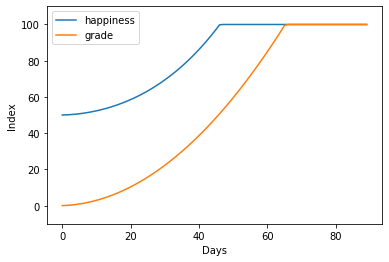

In [28]:
# Calling function:

testing_2()

***The results shouldn't surprise us, this student maxed out his happines scale long before the grades.***

--------------------------------------------------------------------------------------------------------------------

# CONCLUSION:

GOD has linked the happines of human beings with the amount of work they put into something. Humans are also wired and attracted to take the path of least resistence which is why not many people are successful and aren't leading a happier and fulfilled life. Every human is self aware in a sense that they know what they should be doing and if we don't do it, guess what do we have, ANXIETY.

Our 2 test cases have verified this phenomeon to some extent. The Student who opted the path of least resistence and decided to do the CHEATING to clear the course-his happiness has leveled out to zero before he could enjoy the GRADES of 100%.

The other Student has attained FULL HAPPINESS long before he gets to the MAXIMUM GRADES, the reason is simple and at the same time a hard pill to swallow. Over the course of life if he maintained this work ethic he will have a lot of self respect and a self confidence which is fundamental to ones success.

# ACKNOWLEDGMENTS:

I am highly aware of the ZERO TOLERANCE policy against plagirisim and know that it could result in being kicked out of the course. I will make sure to not put the reputation at stake of the Harrisburg University faculty and students.

It is also acknowledged in the orientation that if I am using/copying the code or any other content It should be cited clearly.